In [31]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import glob
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn.preprocessing import StandardScaler

# Variance Captured by PCs

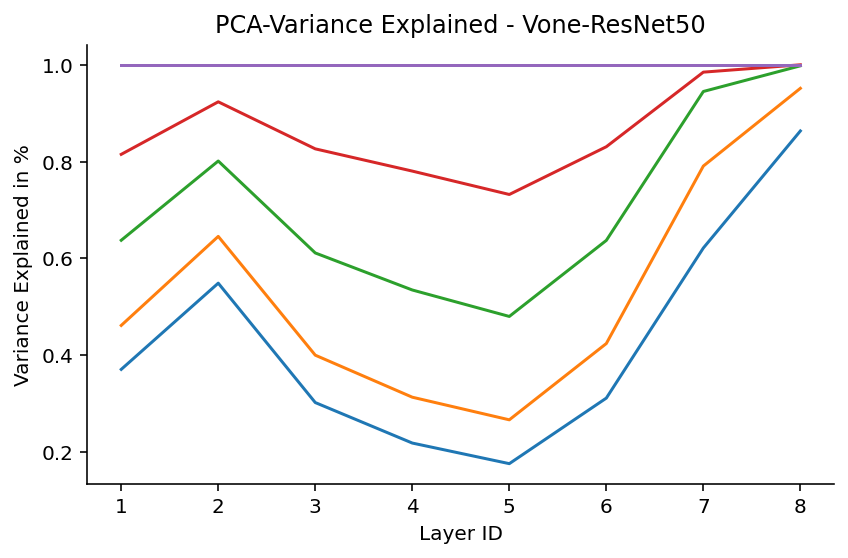

In [38]:
base_path = "../data/pca_variance/vone-resnet50/"
var_exp_paths = [base_path + "50_pca_variance.npy",
                 base_path + "100_pca_variance.npy",
                 base_path + "250_pca_variance.npy",
                 base_path + "500_pca_variance.npy",
                 base_path + "1000_pca_variance.npy"]

fig, ax = plt.subplots()
for p in var_exp_paths:
    var = np.load(p)
    ax.plot(np.arange(1, len(var)+1), var)
ax.set_xlabel("Layer ID")
ax.set_ylabel(r"Variance Explained in %")
ax.set_title("PCA-Variance Explained - Vone-ResNet50")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()

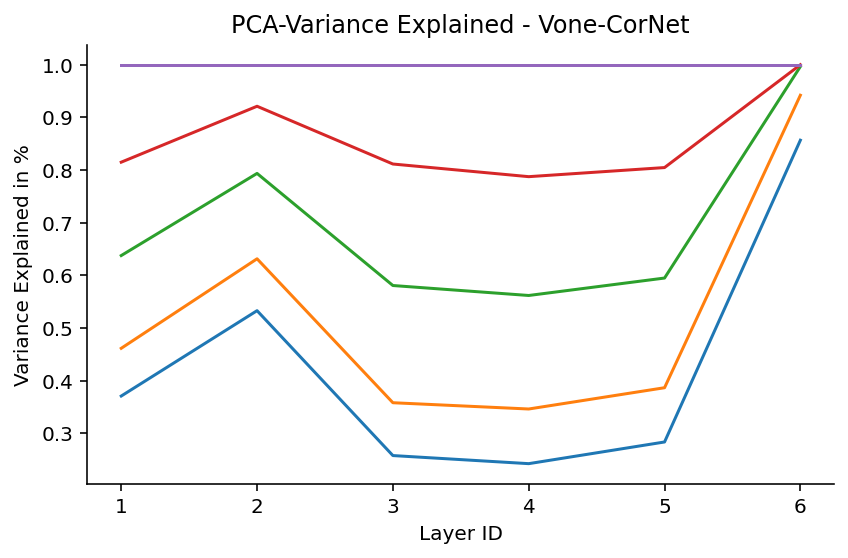

In [37]:
base_path = "../data/pca_variance/vone-cornets/"
var_exp_paths = [base_path + "50_pca_variance.npy",
                 base_path + "100_pca_variance.npy",
                 base_path + "250_pca_variance.npy",
                 base_path + "500_pca_variance.npy",
                 base_path + "1000_pca_variance.npy"]

fig, ax = plt.subplots()
for p in var_exp_paths:
    var = np.load(p)
    ax.plot(np.arange(1, len(var)+1), var)
ax.set_xlabel("Layer ID")
ax.set_ylabel(r"Variance Explained in %")
ax.set_title("PCA-Variance Explained - Vone-CorNet")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()

# Load data for one layer

In [10]:
layer = "layer_8"
activations_dir = "../data/features/alexnet/activations"
activations_file_list = glob.glob(activations_dir +'/*' + layer + '.npy')
activations_file_list.sort()
feature_dim = np.load(activations_file_list[0]).shape[0]
x = np.zeros((len(activations_file_list),feature_dim))
for i, activation_file in enumerate(activations_file_list):
    temp = np.load(activation_file)
    x[i,:] = temp
x_train = x[:1000,:]
x_test = x[1000:]

x_test = StandardScaler().fit_transform(x_test)
x_train = StandardScaler().fit_transform(x_train)

# Explore Different Dim Reduction Techniques

In [28]:
all_methods = ['standard', 'ltsa', 'hessian', 'modified']
n_components = 100
n_neighbors = 25

method = manifold.LocallyLinearEmbedding(method=all_methods[0],
                                         n_neighbors=n_neighbors,
                                         n_components=n_components,
                                         eigen_solver='auto')
method.fit(x_train)
method.transform(x_train).shape

/Users/rtl/anaconda2/envs/ma-vision/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_neighbors=25, n_components=100 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


(1000, 100)

In [29]:
method.reconstruction_error_

5.500718212049474

In [19]:
method = manifold.TSNE(n_components=100, init='pca',
                       random_state=0, perplexity=100,
                       method='exact')
method.fit_transform(x_train).shape

AttributeError: 'TSNE' object has no attribute 'transform'

In [ ]:
method = manifold.Isomap(n_neighbors, n_components)
method = manifold.MDS(n_components, max_iter=100, n_init=1)
method = manifold.SpectralEmbedding(n_components=n_components,
                                    n_neighbors=n_neighbors)